# <font color='#28B463'>FEATURE TRANSFORMATION : CENTERING

<br>

## <font color='#28B463'>Introduction

<br>

In [1]:
# SETUP : importing

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import math

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

import utilcompute as uc
import utilplot as up
import preprocessing as pre

from scipy import stats


C:\Users\danis_p50\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# SETUP : reading in the datasets

data = np.column_stack( (load_boston().data, load_boston().target) )
df = pd.DataFrame(data)
df.columns = [
    'CRIM',    # per capita crime rate by town
    'ZN',      # proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',   # proportion of non-retail business acres per town
    'CHAS',    # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX',     # nitric oxides concentration (parts per 10 million)
    'RM',      # average number of rooms per dwelling
    'AGE',     # proportion of owner-occupied units built prior to 1940
    'DIS',     # weighted distances to five Boston employment centres
    'RAD',     # index of accessibility to radial highways
    'TAX',     # full-value property-tax rate per $10,000
    'PTRATIO', # pupil-teacher ratio by town
    'B',       # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT',   # % lower status of the population
    'MEDV'     # median value of owner-occupied homes in $1000's
]


In [3]:
#df.describe()

In [4]:
# SHUFFLING 

seed = 10
np.random.seed(seed)

df = df.reindex(np.random.permutation(df.index))


In [5]:
# FEATURES SELECTION 

target = 'MEDV'
features = [c for c in df.columns if (c != target)]


In [6]:
# DATA PRE-PROCESSING : centering

selected_features = ['RM', 'B', 'PTRATIO']
excluded_features = [f for f in features if (f not in selected_features)]

df_cnt = pre.center(df = df, included = selected_features, excluded = uc.concatenate(excluded_features,[target]))


In [7]:
linear_list = [
    { 'df' : df,     'linear_model_name' : 'LinearRegression', 
     'linear_model_args' : {'fit_intercept' : True}, 'note' : 'original' },
    { 'df' : df_cnt, 'linear_model_name' : 'LinearRegression', 
     'linear_model_args' : {'fit_intercept' : True}, 'note' : 'centered' },   
]

results = pd.DataFrame()

for l in linear_list:
    results_temp = uc.compute_kfold_stats(
        df = l['df'], 
        features = features, 
        target = [target], 
        linear_model_name = l['linear_model_name'], 
        linear_model_args = l['linear_model_args'],
        note = l['note']
    )
    results = results.append(results_temp).reset_index(drop = True)

#print(results[['note','intercept', 'err_test', 'coef']])

## <font color='#28B463'>Impact on the transformed features

<br>

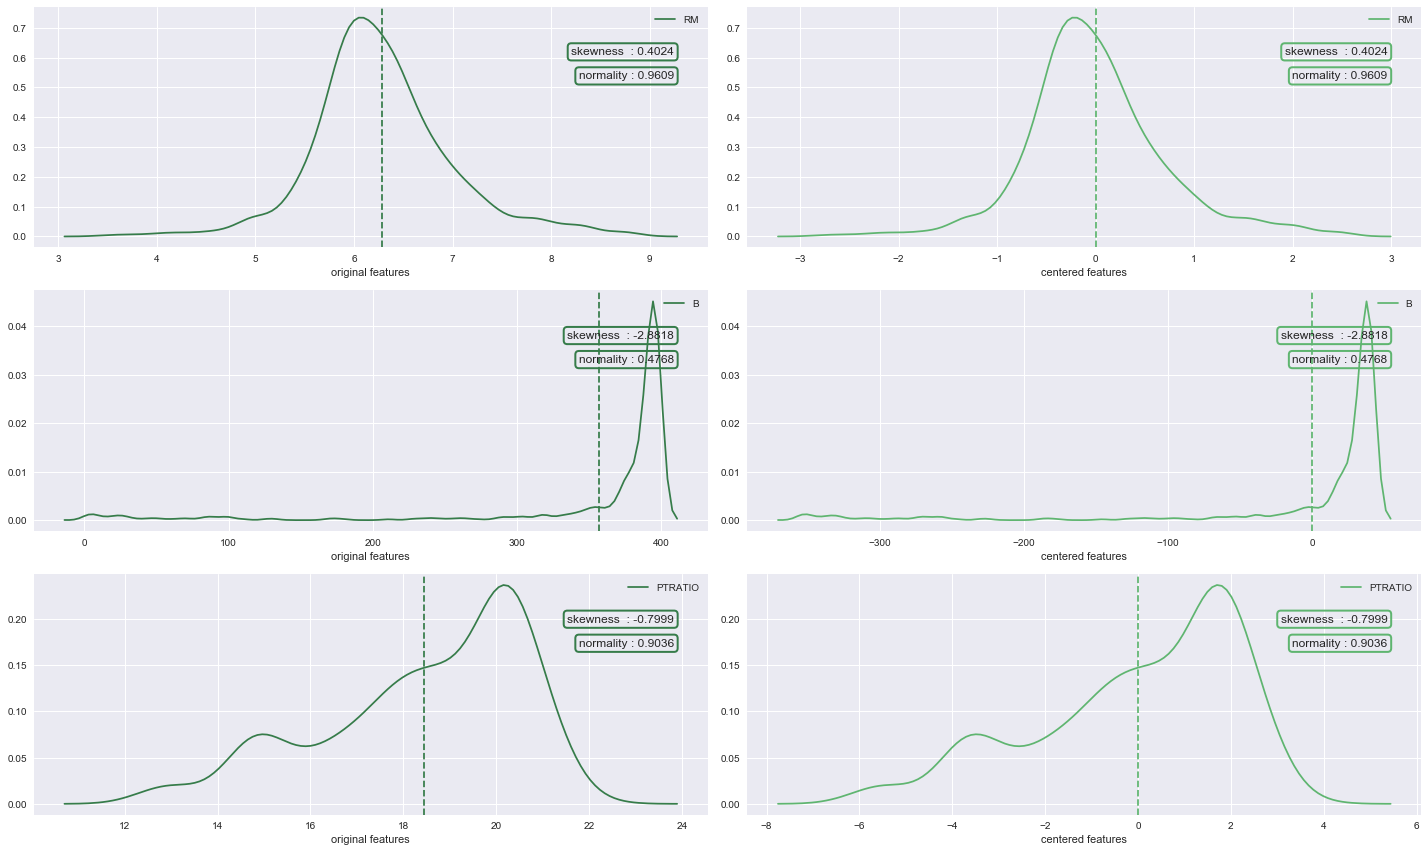

In [8]:
plot_list = [
    { 'df' : df,     'xlabel' : 'original features',   'legend_loc' : 'best'},
    { 'df' : df_cnt, 'xlabel' : 'centered features', 'legend_loc' : 'best'}
]

visualized_features = selected_features

n_cols = len(plot_list)
fig, axs = plt.subplots(nrows = len(visualized_features), ncols = n_cols, figsize=(20, 4 * len(visualized_features)))    
pal = sns.color_palette("Greens_d", n_cols)

p = 0
for (pl_index, pl_dict) in enumerate(plot_list):      
    for (f_index,f) in enumerate(visualized_features) :
        ax = axs[f_index][pl_index] 
        subset = pl_dict['df'][f]       
        
        skewness = round(stats.skew(subset),4)
        normality = round(stats.shapiro(subset)[0],4)
        
        sns.distplot(a = subset, hist = False, kde = True, rug = False, color = pal[p], ax = ax, label = f)   
        ax.axvline(x = subset.mean(), color = pal[p], linestyle='--')
        
        ax.text(x = 0.95, y = 0.8, horizontalalignment='right', s = ('skewness  : {0}'.format(skewness)),  
            transform = ax.transAxes, bbox = dict(boxstyle = "round, pad=0.3", fill = False, ec = pal[p], lw = 2))
        ax.text(x = 0.95, y = 0.7, horizontalalignment='right', s = ('normality : {0}'.format(normality)),  
            transform = ax.transAxes, bbox = dict(boxstyle = "round, pad=0.3", fill = False, ec = pal[p], lw = 2))        
        
        ax.set_xlabel(pl_dict['xlabel'])
        ax.legend(loc = pl_dict['legend_loc'])
    p += 1
        

plt.tight_layout()
plt.show()


## <font color='#28B463'>Impact on the VIF

<br>

In [9]:
vif_list = [
    {'df' : df,     'features' : features, 'label' : 'original'},
    {'df' : df_cnt, 'features' : features, 'label' : 'centered'},
]

template = "{0:<20}:{1:>10}" 
   
for vl in vif_list:    
    vif_dict = uc.compute_vif(df = vl['df'], features = vl['features'])
    print('VIF ({0})'.format(vl['label']))
    print()
    for (key, value) in vif_dict.items():
        print(template.format(key, round(value,4)))
    print()
    print()


VIF (original)

CRIM                :    2.0746
ZN                  :    2.8439
INDUS               :   14.4843
CHAS                :    1.1529
NOX                 :   73.9022
RM                  :    77.935
AGE                 :   21.3868
DIS                 :   14.6994
RAD                 :   15.1547
TAX                 :   61.2269
PTRATIO             :   85.0273
B                   :    20.066
LSTAT               :   11.0889


VIF (centered)

CRIM                :    2.0799
ZN                  :    2.8219
INDUS               :   14.3687
CHAS                :    1.1533
NOX                 :   51.0486
RM                  :    1.8418
AGE                 :   21.0204
DIS                 :    8.1886
RAD                 :   15.2063
TAX                 :   58.8879
PTRATIO             :    1.7769
B                   :    1.3179
LSTAT               :   12.1651




## <font color='#28B463'>Impact on the intercept

<br>

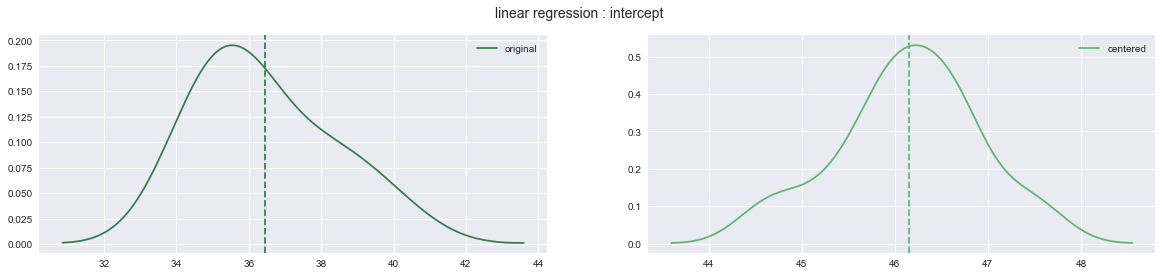

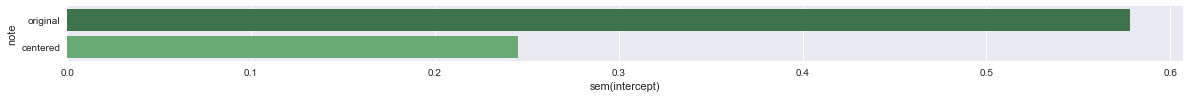

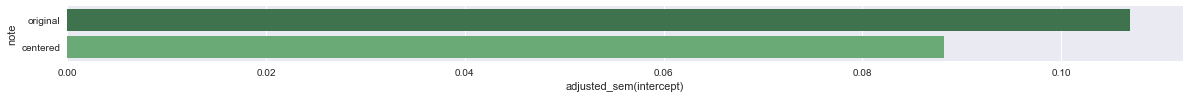

In [10]:
up.plot_across_discriminant(
    df = results, 
    cols = ['intercept'], 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = True,
    sem      = True, 
    adj_sem  = True,
    mean     = False
)

## <font color='#28B463'>Impact on the regression coefficients of the transformed features

<br>

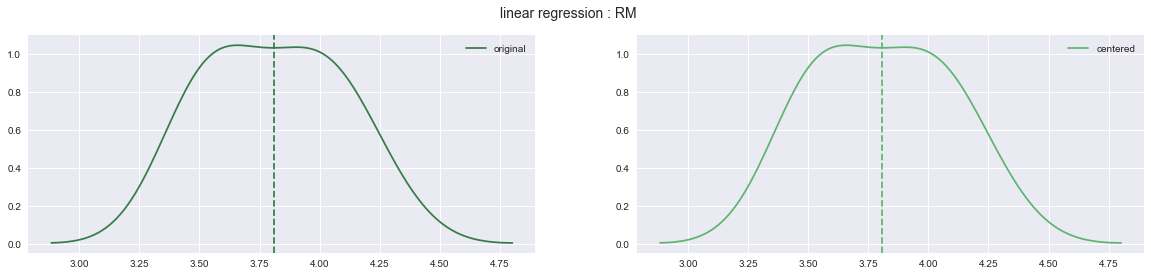

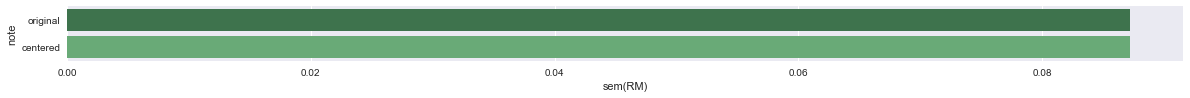

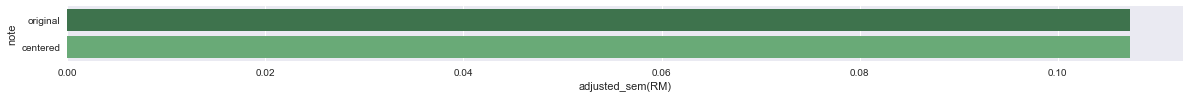

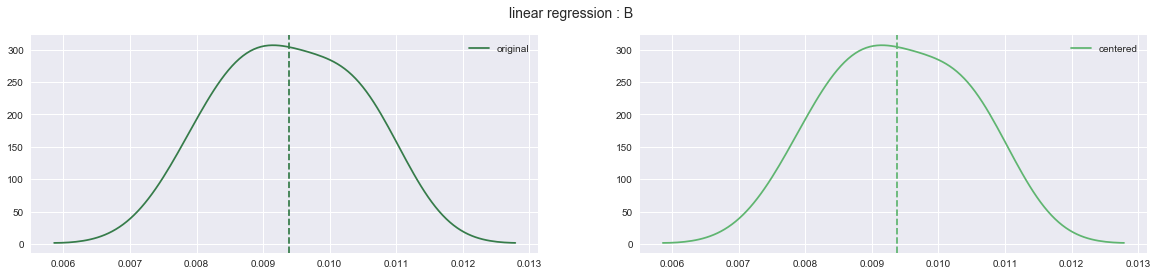

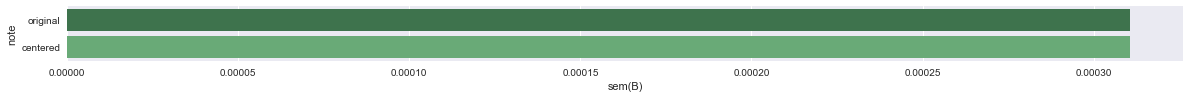

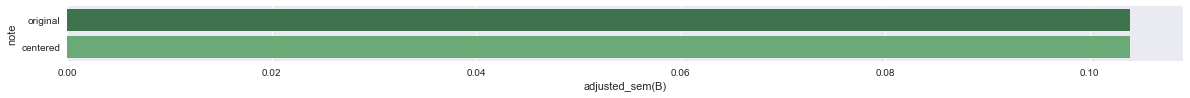

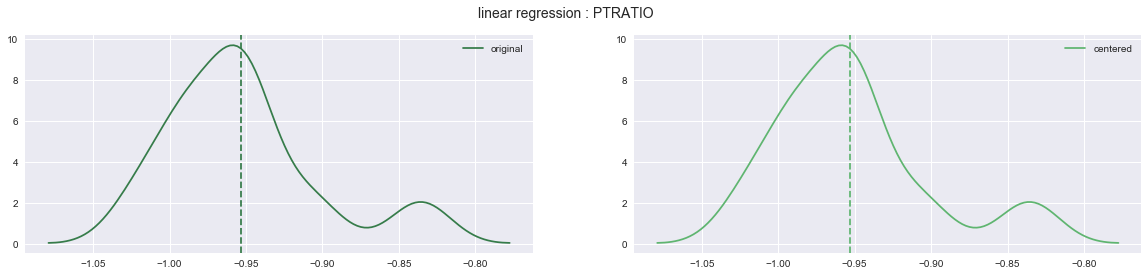

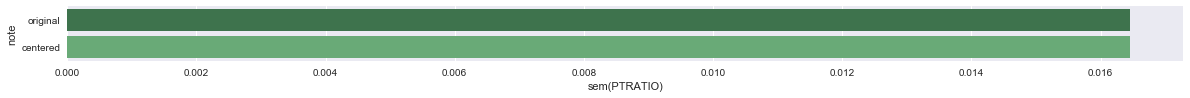

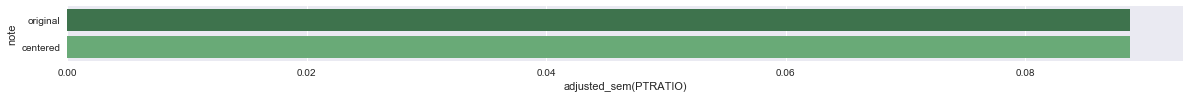

In [11]:
visualized_features = selected_features

up.plot_across_discriminant(
    df = results, 
    cols = visualized_features, 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = True,
    sem      = True, 
    adj_sem  = True,
    mean     = False
)    
    

## <font color='#28B463'>Impact on the regression coefficients of the non-transformed features

<br>

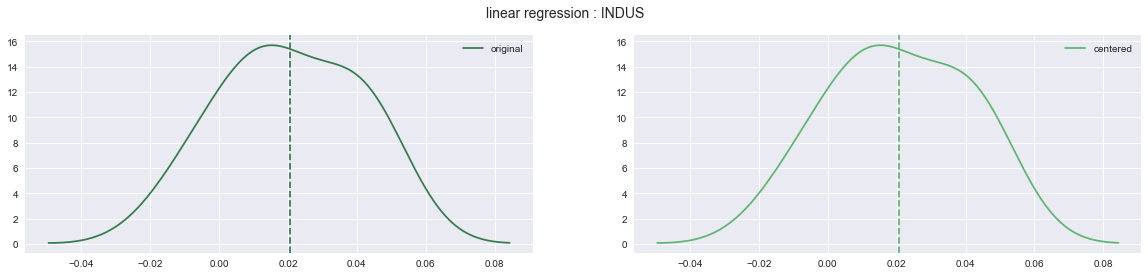

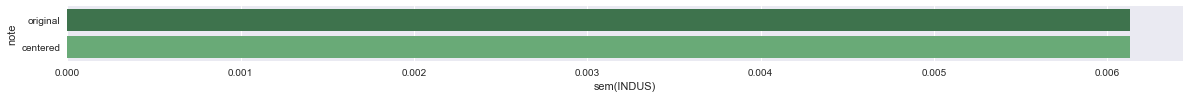

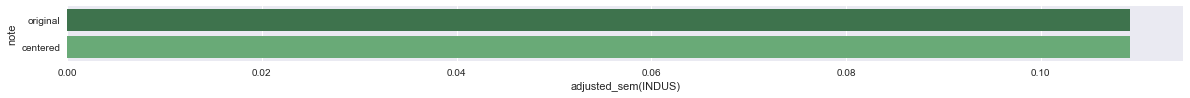

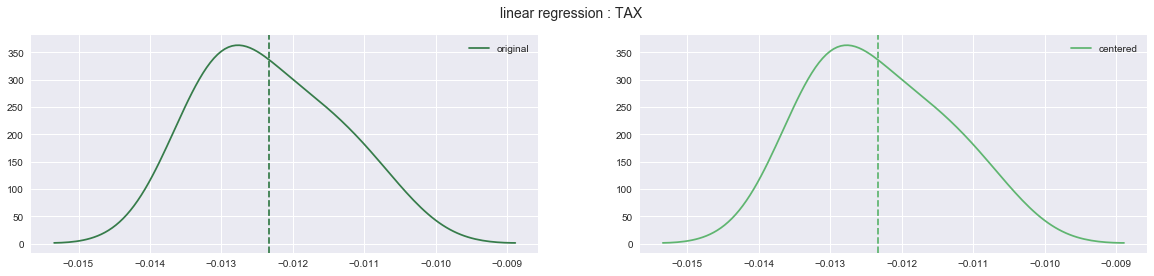

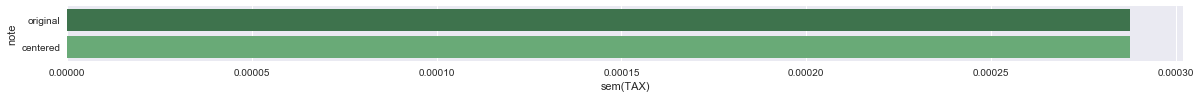

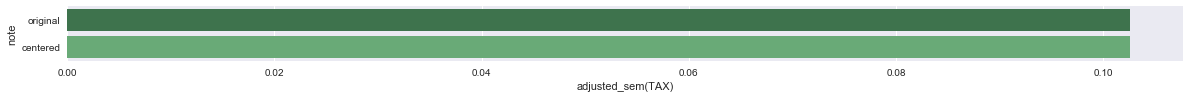

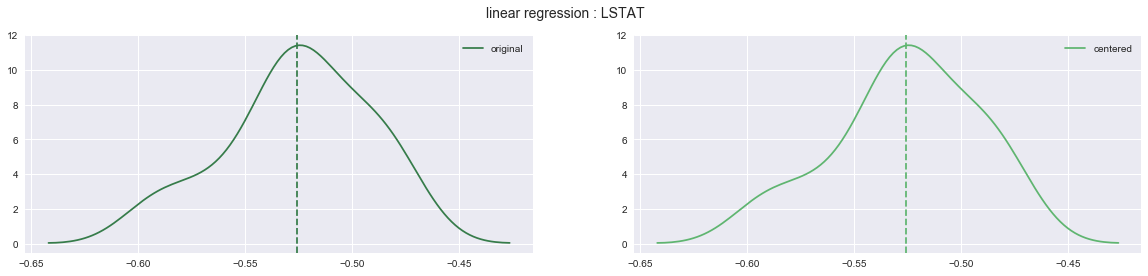

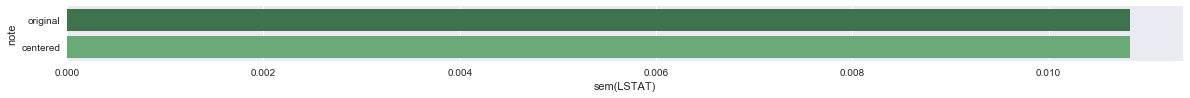

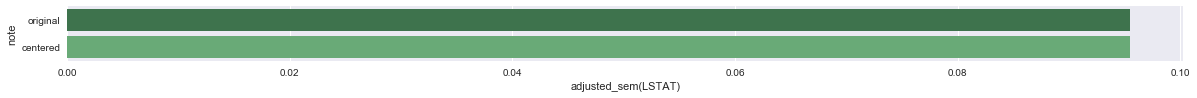

In [12]:
#non_selected_features = [f for f in features if (f not in selected_features)]
non_selected_features = ['INDUS', 'TAX', 'LSTAT']
visualized_features = non_selected_features

up.plot_across_discriminant(
    df = results, 
    cols = visualized_features, 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = True,
    sem      = True, 
    adj_sem  = True,
    mean     = False
)


## <font color='#28B463'>Impact on the regression score

<br>

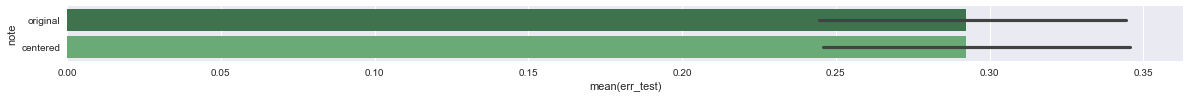

In [13]:
up.plot_across_discriminant(
    df = results, 
    cols = ['err_test'], 
    discriminant_col = 'note', 
    plot_args = {'title' : 'linear regression', 'skewness' : False, 'normality' : False}, 
    distplot = False,
    sem      = False, 
    adj_sem  = False,
    mean     = True
)
